In [1]:


from pcpptc import PolygonInstance
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver import (
    FractionalGridSolver,
)
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver.integralizer import (
    IntegralizingBnBTree,
    ReducedCostBranchingStrategy,
)
from pcpptc.grid_solver.grid_instance import VertexPassage
from pcpptc.grid_solver.grid_solution import FractionalSolution
from pcpptc.grid_solver.grid_solution.coverage_analysis import (
    compute_coverage_polygon_of_grid,
)
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid
import numpy as np
from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

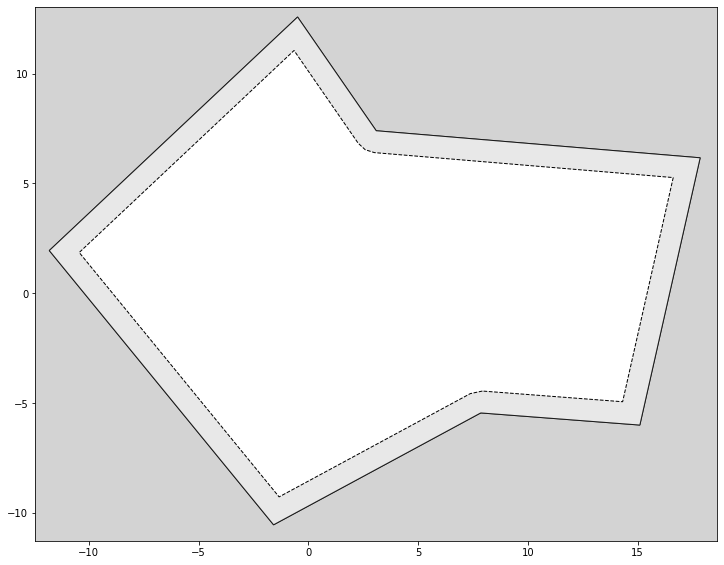

In [2]:
from pcpptc.plot.intermediate import (
    plot_graph,
    plot_points,
    plot_fractional_solution,
    plot_turn,
)

pi = PolygonInstance.from_json(file_path="./01c_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plt.show()
pi.expensive_areas = []

In [3]:
def plot_branching(
    ax: plt.Axes,
    sol: FractionalSolution,
    branch: VertexPassage,
    color="black",
    branch_color="red",
    linewidth=1.0,
    zorder=2,
):
    for vp, x in sol:
        vp: VertexPassage
        x: float
        if x > 0.01:
            lw = x if vp.end_a != vp.end_b else 2 * x
            if vp != branch:
                plot_turn(
                    ax,
                    vp.end_a,
                    vp.v,
                    vp.end_b,
                    lw * linewidth,
                    color=color,
                    zorder=zorder,
                )
            else:
                plot_turn(
                    ax,
                    vp.end_a,
                    vp.v,
                    vp.end_b,
                    lw * linewidth,
                    color=branch_color,
                    zorder=zorder,
                )

In [4]:
figsize = (3.5, 3.5)

In [5]:
t = DmshGrid(full_coverage=True, point_based=True, buffer=0.1, simplification=0.1)
gi3 = t(pi)

<Figure size 432x288 with 0 Axes>

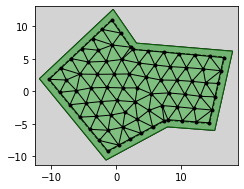

In [6]:
ax = setup_plot(figsize=figsize)
# ax = setup_plot()
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.show()

Academic license - for non-commercial use only - expires 2021-09-25
Using license file /home/ANONYMOUS_USER/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 274 rows, 1246 columns and 3346 nonzeros
Model fingerprint: 0x1759e4a0
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 274 rows, 1246 columns, 3346 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.800000e+01   0.000000e+00      0s
     279    2.0796692e+02   0.000000e+00   0.000000e+00      0s

Solved in 279 iterations and 0.01 seconds
Optimal objective  2.079669152e+02


<Figure size 432x288 with 0 Axes>

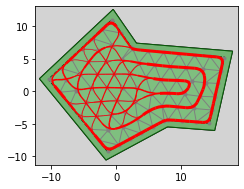

In [7]:
fs = FractionalGridSolver()(gi3)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
plt.savefig("./04a_frac1.pdf")
plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 274 rows, 1246 columns and 3346 nonzeros
Model fingerprint: 0x1759e4a0
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 274 rows, 1246 columns, 3346 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.800000e+01   0.000000e+00      0s
     279    2.0796692e+02   0.000000e+00   0.000000e+00      0s

Solved in 279 iterations and 0.02 seconds
Optimal objective  2.079669152e+02
Adding VertexPassage(PointVertex[140648835489168]@(-8.672899097928592, -0.1480735350350233)<- PointVertex[140648849843024]@(-10.30032179019641, 1.8418641968494436) ->PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512))>=1
Gurobi Optimizer version 9.1.2 

<Figure size 432x288 with 0 Axes>

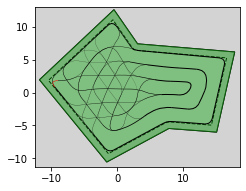

Adding VertexPassage(PointVertex[140649647097488]@(-0.8667533184050605, -3.651072268690639)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 276 rows, 1246 columns and 3348 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0807391e+02   5.200000e-01   0.000000e+00      0s
      27    2.0996142e+02   0.000000e+00   0.000000e+00      0s

Solved in 27 iterations and 0.01 seconds
Optimal objective  2.099614232e+02
Removing VertexPassage(PointVertex[140649647097488]@(-0.8667533184050605, -3.651072268690639)<- PointVertex[140649647189776]@(-1.269

<Figure size 432x288 with 0 Axes>

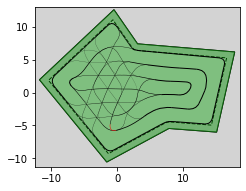

Adding VertexPassage(PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699)<- PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813) ->PointVertex[140648835488656]@(8.02228517855691, -0.24808110009995585))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 277 rows, 1246 columns and 3349 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0835108e+02   5.000000e-01   0.000000e+00      0s
      25    2.0947482e+02   0.000000e+00   0.000000e+00      0s

Solved in 25 iterations and 0.00 seconds
Optimal objective  2.094748248e+02
Removing VertexPassage(PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699)<- PointVertex[140648835488528]@(5.38265

<Figure size 432x288 with 0 Axes>

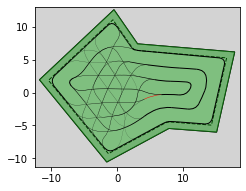

Adding VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 278 rows, 1246 columns and 3350 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0871559e+02   4.961538e-01   0.000000e+00      0s
      29    2.0910960e+02   0.000000e+00   0.000000e+00      0s

Solved in 29 iterations and 0.00 seconds
Optimal objective  2.091095991e+02
Removing VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.3333974

<Figure size 432x288 with 0 Axes>

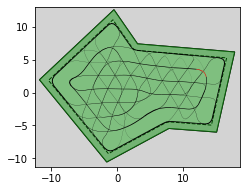

Adding VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Adding VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))>=1
Removing VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 279 rows, 1246 columns and 3351 nonzeros
Model fingerprint: 0xf780ab28
Coefficient statistics:
  Matrix range     [1e+00, 2e+

<Figure size 432x288 with 0 Axes>

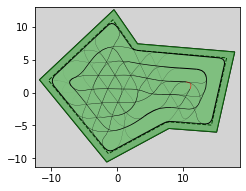

Adding VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))>=1
Adding VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))>=1
Removing VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 280 rows, 1246 columns and 3352 nonzeros
Model fingerprint: 0xfce9a0c9
Coefficient statistics:
  Matrix range     [1e+00, 2

<Figure size 432x288 with 0 Axes>

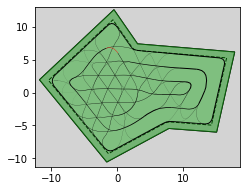

Removing VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Removing VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))>=1
Adding VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))>=1
Removing VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))<=0
Adding VertexPassage(PointVertex[1406488

<Figure size 432x288 with 0 Axes>

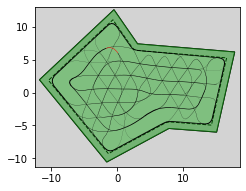

Adding VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Adding VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))>=1
Removing VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))<=0
Removing VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))<=0
Adding VertexPassage(PointVertex[14064883548

<Figure size 432x288 with 0 Axes>

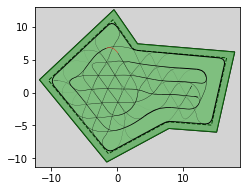

Adding VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))>=1
Adding VertexPassage(PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502)<- PointVertex[140648837009808]@(0.6863861894541576, 8.943772129874038) ->PointVertex[140648849842960]@(-0.6673911712498481, 10.901690201543202))>=1
Removing VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 281 rows, 1246 columns and 3353 nonzeros
Model fingerprint: 0x703eb19c
Coefficient statistics:
  Matrix range     [1e+00, 

<Figure size 432x288 with 0 Axes>

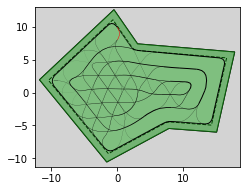

Removing VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))>=1
Adding VertexPassage(PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502)<- PointVertex[140648837009808]@(0.6863861894541576, 8.943772129874038) ->PointVertex[140648849842960]@(-0.6673911712498481, 10.901690201543202))>=1
Removing VertexPassage(PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502)<- PointVertex[140648837009808]@(0.6863861894541576, 8.943772129874038) ->PointVertex[140648849842960]@(-0.6673911712498481, 10.901690201543202))<=0
Adding VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))<=0
Gurobi Optimizer version 9.1.2 build v

<Figure size 432x288 with 0 Axes>

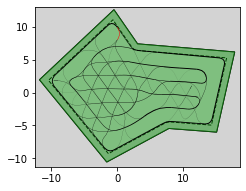

Removing VertexPassage(PointVertex[140648836993616]@(13.710654142067336, 1.3118498576904205)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Adding VertexPassage(PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779)<- PointVertex[140648836995152]@(13.333397485539871, 3.433696795681656) ->PointVertex[140648836995024]@(10.754358131382684, 3.6526899971419384))>=1
Removing VertexPassage(PointVertex[140648835488784]@(10.503826693245406, -0.46575663958374164)<- PointVertex[140648836993488]@(11.603680324171652, 1.5332415614644779) ->PointVertex[140648836993360]@(9.275002706575275, 1.6925412084740825))<=0
Removing VertexPassage(PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502)<- PointVertex[140648837009808]@(0.6863861894541576, 8.943772129874038) ->PointVertex[140648849842960]@(-0.6673911712498481, 10.901690201543202))<=0
Adding VertexPassage(PointVertex[140648

<Figure size 432x288 with 0 Axes>

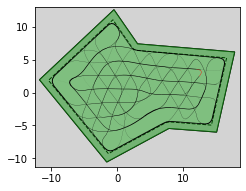

Adding VertexPassage(PointVertex[140648835488656]@(8.02228517855691, -0.24808110009995585)<- PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813) ->PointVertex[140648836993104]@(3.209318388745276, 0.5288249584235977))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 281 rows, 1246 columns and 3353 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0945120e+02   4.938272e-01   0.000000e+00      0s
      33    2.1010063e+02   0.000000e+00   0.000000e+00      0s

Solved in 33 iterations and 0.00 seconds
Optimal objective  2.101006350e+02
Removing VertexPassage(PointVertex[140648835488656]@(8.02228517855691, -0.24808110009995585)<- PointVertex[140648835488528]@(5.382651

<Figure size 432x288 with 0 Axes>

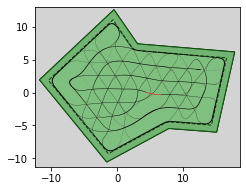

Adding VertexPassage(PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699)<- PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813) ->PointVertex[140648835488656]@(8.02228517855691, -0.24808110009995585))>=1
Adding VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))>=1
Removing VertexPassage(PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699)<- PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813) ->PointVertex[140648835488656]@(8.02228517855691, -0.24808110009995585))<=0
Removing VertexPassage(PointVertex[140648836995792]@(0.8102088962452147, 4.888750679750202)<- PointVertex[140648837009552]@(-0.6146889949202626, 7.120752302693502) ->PointVertex[140648836996944]@(-2.7698890207047366, 6.311992652462536))<=0
Removing VertexPassage(PointVertex[14

<Figure size 432x288 with 0 Axes>

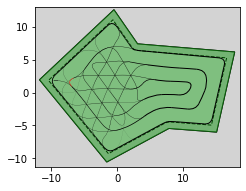

Adding VertexPassage(PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813)<- PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699) ->PointVertex[140648836993104]@(3.209318388745276, 0.5288249584235977))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 279 rows, 1246 columns and 3351 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0950420e+02   6.666667e-01   0.000000e+00      0s
      22    2.1132885e+02   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.01 seconds
Optimal objective  2.113288516e+02
Removing VertexPassage(PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813)<- PointVertex[140648835488400]@(2.8960

<Figure size 432x288 with 0 Axes>

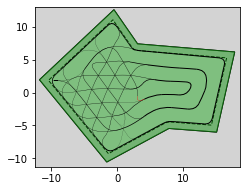

Adding VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))>=1
Adding VertexPassage(PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813)<- PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699) ->PointVertex[140648836993104]@(3.209318388745276, 0.5288249584235977))>=1
Removing VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))<=0
Removing VertexPassage(PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813)<- PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699) ->PointVertex[140648836993104]@(3.209318388745276, 0.5288249584235977))<=0
Gurobi Optimizer version 9.1.2 build v

<Figure size 432x288 with 0 Axes>

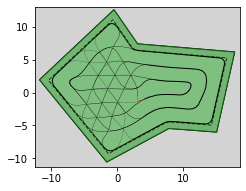

Removing VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))>=1
Adding VertexPassage(PointVertex[140649647096400]@(-3.0957613839065368, -3.8456120810646293)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))>=1
Adding VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 280 rows, 1246 columns and 3352 nonzeros
Model fingerprint: 0xd673af31
Coefficient statistics:
  Matrix range     [1e+00,

<Figure size 432x288 with 0 Axes>

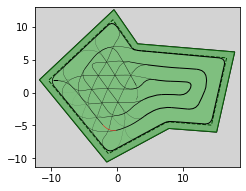

Adding VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))>=1
Adding VertexPassage(PointVertex[140649647096400]@(-3.0957613839065368, -3.8456120810646293)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))>=1
Removing VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))<=0
Removing VertexPassage(PointVertex[140649647096400]@(-3.0957613839065368, -3.8456120810646293)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))<=0
Gurobi Optimizer version 9.1.2 bui

<Figure size 432x288 with 0 Axes>

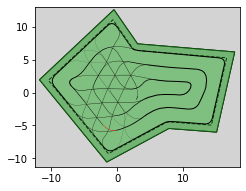

Adding VertexPassage(PointVertex[140648849843152]@(-1.3073271291437876, -9.15435668890381)<- PointVertex[140648838841744]@(-2.626632076114894, -7.5411711862602235) ->PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 281 rows, 1246 columns and 3353 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0981869e+02   5.000000e-01   0.000000e+00      0s
      15    2.1173591e+02   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.01 seconds
Optimal objective  2.117359134e+02
Removing VertexPassage(PointVertex[140648849843152]@(-1.3073271291437876, -9.15435668890381)<- PointVertex[140648838841744]@(-2.6266

<Figure size 432x288 with 0 Axes>

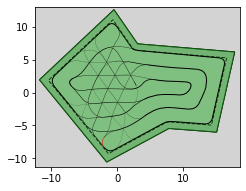

Removing VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))>=1
Adding VertexPassage(PointVertex[140648849843152]@(-1.3073271291437876, -9.15435668890381)<- PointVertex[140648838841744]@(-2.626632076114894, -7.5411711862602235) ->PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827))>=1
Removing VertexPassage(PointVertex[140648849843152]@(-1.3073271291437876, -9.15435668890381)<- PointVertex[140648838841744]@(-2.626632076114894, -7.5411711862602235) ->PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827))<=0
Adding VertexPassage(PointVertex[140648835489296]@(-6.135365697289176, 0.11215730136170103)<- PointVertex[140648836994000]@(-7.683499495238309, 1.7389773048531512) ->PointVertex[140648836994128]@(-5.58788572682593, 2.6445192492188077))<=0
Gurobi Optimizer version 9.1.2 build

<Figure size 432x288 with 0 Axes>

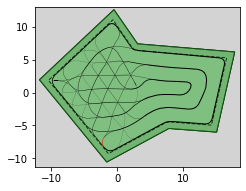

Adding VertexPassage(PointVertex[140649647097488]@(-0.8667533184050605, -3.651072268690639)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))>=1
Removing VertexPassage(PointVertex[140649647097488]@(-0.8667533184050605, -3.651072268690639)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))<=0
Removing VertexPassage(PointVertex[140648835488528]@(5.3826518371779155, -0.38116304962146813)<- PointVertex[140648835488400]@(2.8960524849354483, -1.615186294056699) ->PointVertex[140648836993104]@(3.209318388745276, 0.5288249584235977))<=0
Removing VertexPassage(PointVertex[140649647096400]@(-3.0957613839065368, -3.8456120810646293)<- PointVertex[140649647189776]@(-1.2692645428338194, -5.976799115114827) ->PointVertex[140649647187344]@(0.9778742106288842, -5.506301680946802))<=0
Removing VertexPassage(PointVe

<Figure size 432x288 with 0 Axes>

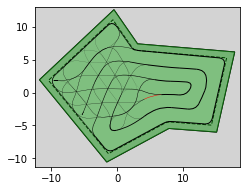

In [16]:
bnb = IntegralizingBnBTree(gi3)
for i in range(20):
    if bnb.is_integral():
        break
    node, vp = bnb.branch()
    ax = setup_plot(figsize=figsize)
    plot_polygon_instance(ax, pi)
    plot_branching(ax, node.solution, vp)
    plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 224 rows, 1006 columns and 2698 nonzeros
Model fingerprint: 0x915e9fa3
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 224 rows, 1006 columns, 2698 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   6.400000e+01   0.000000e+00      0s
     278    1.7549321e+02   0.000000e+00   0.000000e+00      0s

Solved in 278 iterations and 0.01 seconds
Optimal objective  1.754932062e+02


<Figure size 432x288 with 0 Axes>

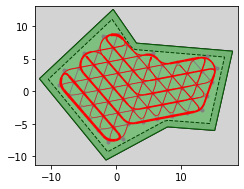

In [9]:
t = RotatingRegularHexagonal(full_coverage=True, point_based=False)
gi2 = t(pi)

fs = FractionalGridSolver()(gi2)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi)
plot_graph(ax, gi2.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
# plt.savefig("./04a_frac1.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

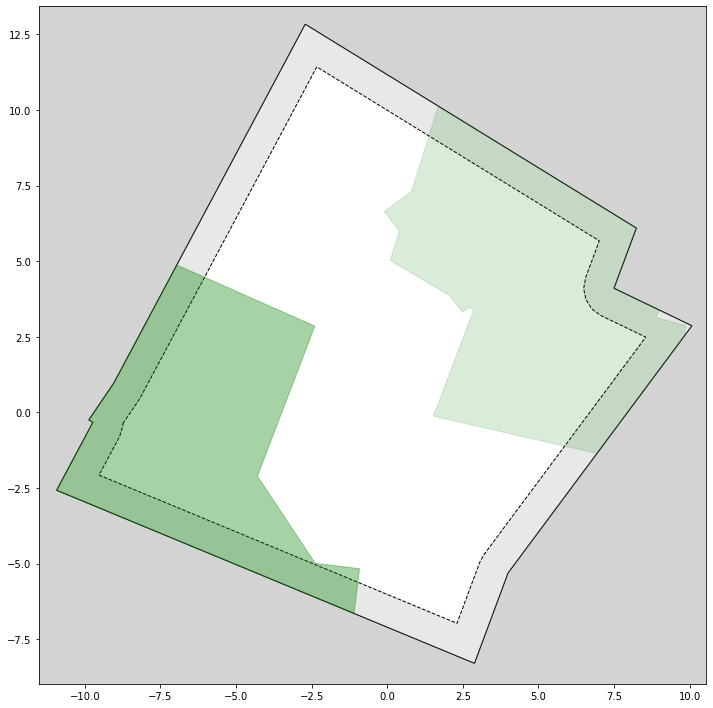

In [10]:
pi2 = PolygonInstance.from_json(file_path="./01d_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi2)
plt.show()

In [11]:
t = DmshGrid(full_coverage=False, point_based=True, buffer=0.1, simplification=0.1)
gi = t(pi2)

<Figure size 432x288 with 0 Axes>

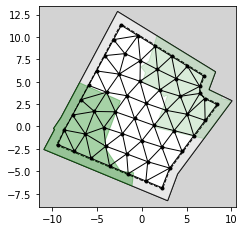

In [12]:
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 167 rows, 844 columns and 1942 nonzeros
Model fingerprint: 0x7e8d40a9
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 12 columns
Presolve time: 0.01s
Presolved: 167 rows, 832 columns, 1930 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.600000e+01   0.000000e+00      0s
     169    1.9543245e+02   0.000000e+00   0.000000e+00      0s

Solved in 169 iterations and 0.02 seconds
Optimal objective  1.954324494e+02


<Figure size 432x288 with 0 Axes>

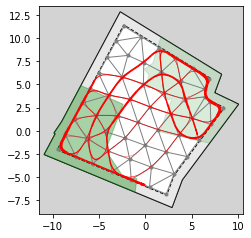

In [13]:
fs = FractionalGridSolver()(gi)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.savefig("./04a_frac2.pdf")
plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 167 rows, 844 columns and 1942 nonzeros
Model fingerprint: 0x7e8d40a9
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 12 columns
Presolve time: 0.01s
Presolved: 167 rows, 832 columns, 1930 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.600000e+01   0.000000e+00      0s
     169    1.9543245e+02   0.000000e+00   0.000000e+00      0s

Solved in 169 iterations and 0.01 seconds
Optimal objective  1.954324494e+02
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.206837588473904

<Figure size 432x288 with 0 Axes>

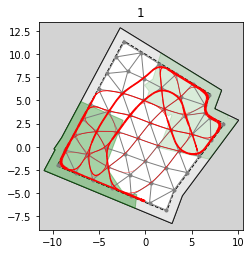

Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 169 rows, 844 columns and 1944 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9543245e+02   6.000000e-01   0.000000e+00      0s
      24    2.0046495e+02   0.000000e+00   0.000000e+00      0s

Solved in 24 iterations and 0.00 seconds
Optimal objective  2.004649525e+02
Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.500058964679

<Figure size 432x288 with 0 Axes>

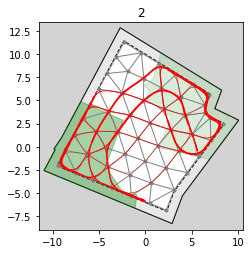

Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 170 rows, 844 columns and 1945 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9617607e+02   5.454545e-01   0.000000e+00      0s
      18    2.0018925e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.00 seconds
Optimal objective  2.001892523e+02
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.738178546484

<Figure size 432x288 with 0 Axes>

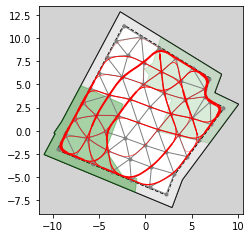

Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 173 rows, 844 columns and 1948 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9924396e+02   5.000000e-01   0.000000e+00      0s
      18    2.0145301e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.00 seconds
Optimal objective  2.014530106e+02
Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.526

<Figure size 432x288 with 0 Axes>

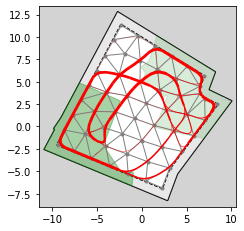

In [20]:
bnb = IntegralizingBnBTree(gi)
node, vp = bnb.branch()
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, node.solution, color="red", linewidth=3.0, zorder=3)
plt.title(bnb.steps)
plt.show()
node, vp = bnb.branch()
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, node.solution, color="red", linewidth=3.0, zorder=3)
plt.title(bnb.steps)
plt.show()
while bnb.steps < 5:
    node, vp = bnb.branch()
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, node.solution, color="red", linewidth=3.0, zorder=3)
plt.show()
while bnb.steps < 40:
    node, vp = bnb.branch()
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi2)
plot_graph(ax, gi.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, node.solution, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
plt.savefig("04a_frac2_int_40.pdf")
plt.show()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 167 rows, 844 columns and 1942 nonzeros
Model fingerprint: 0x7e8d40a9
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 12 columns
Presolve time: 0.01s
Presolved: 167 rows, 832 columns, 1930 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.600000e+01   0.000000e+00      0s
     169    1.9543245e+02   0.000000e+00   0.000000e+00      0s

Solved in 169 iterations and 0.02 seconds
Optimal objective  1.954324494e+02
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.206837588473904

<Figure size 432x288 with 0 Axes>

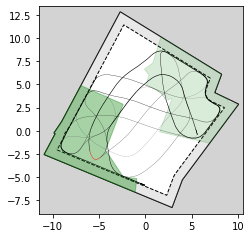

Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 169 rows, 844 columns and 1944 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9543245e+02   6.000000e-01   0.000000e+00      0s
      24    2.0046495e+02   0.000000e+00   0.000000e+00      0s

Solved in 24 iterations and 0.01 seconds
Optimal objective  2.004649525e+02
Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.500058964679

<Figure size 432x288 with 0 Axes>

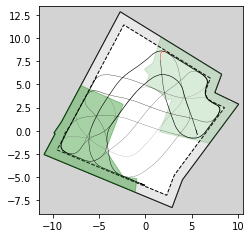

Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 170 rows, 844 columns and 1945 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9617607e+02   5.454545e-01   0.000000e+00      0s
      18    2.0018925e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.01 seconds
Optimal objective  2.001892523e+02
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.738178546484

<Figure size 432x288 with 0 Axes>

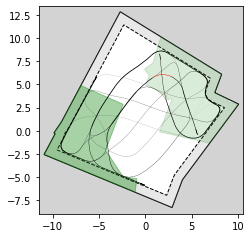

Adding VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 171 rows, 844 columns and 1946 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9709535e+02   5.294118e-01   0.000000e+00      0s
      15    2.0005821e+02   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.01 seconds
Optimal objective  2.000582088e+02
Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451

<Figure size 432x288 with 0 Axes>

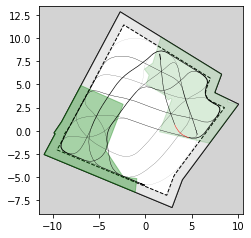

Adding VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 172 rows, 844 columns and 1947 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9811829e+02   5.882353e-01   0.000000e+00      0s
      18    2.0409529e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.00 seconds
Optimal objective  2.040952895e+02
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.68134

<Figure size 432x288 with 0 Axes>

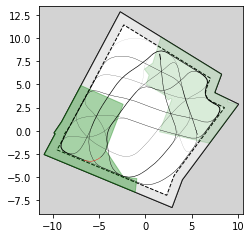

Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 173 rows, 844 columns and 1948 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9924396e+02   5.000000e-01   0.000000e+00      0s
      18    2.0145301e+02   0.000000e+00   0.000000e+00      0s

Solved in 18 iterations and 0.01 seconds
Optimal objective  2.014530106e+02
Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.526

<Figure size 432x288 with 0 Axes>

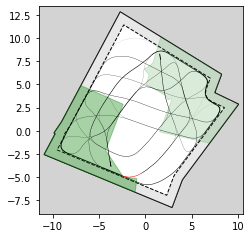

Adding VertexPassage(PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631)<- PointVertex[140648832799440]@(0.4497625070560354, -6.097028636384029) ->PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 174 rows, 844 columns and 1949 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.9995700e+02   5.000000e-01   0.000000e+00      0s
      21    2.1039460e+02   0.000000e+00   0.000000e+00      0s

Solved in 21 iterations and 0.01 seconds
Optimal objective  2.103946027e+02
Removing VertexPassage(PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631)<- PointVertex[140648832799440]@(0.44976

<Figure size 432x288 with 0 Axes>

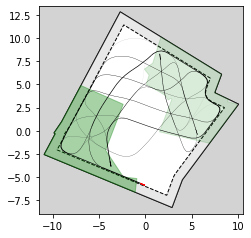

Adding VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))>=1
Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))<=0
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))<=0
Removing VertexPassage(PointVertex[140648

<Figure size 432x288 with 0 Axes>

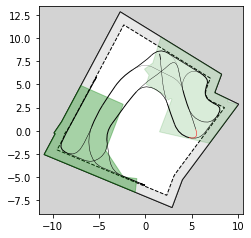

Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148)<- PointVertex[140648839973136]@(-5.056847597667449, 6.199638797910038) ->PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148))>=1
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))<=0
Removing VertexPassage(PointVertex[1406488327988

<Figure size 432x288 with 0 Axes>

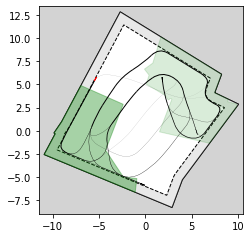

Adding VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 172 rows, 844 columns and 1947 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0025579e+02   5.500000e-01   0.000000e+00      0s
      11    2.0529734e+02   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.01 seconds
Optimal objective  2.052973441e+02
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.68134

<Figure size 432x288 with 0 Axes>

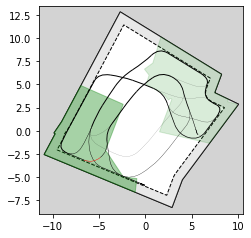

Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))<=0
Removing VertexPassage(PointVertex[140648839974736

<Figure size 432x288 with 0 Axes>

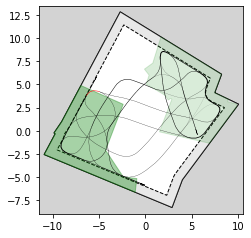

Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))>=1
Removing VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 171 rows, 844 columns and 1946 nonzeros
Model fingerprint: 0xcdcb309b
Coefficient statistics:
  Matrix range     [1e+00, 2e+00

<Figure size 432x288 with 0 Axes>

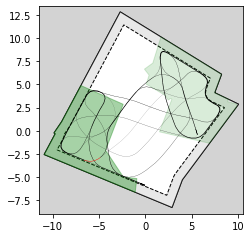

Removing VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))<=0
Gurobi Optimizer version 9.1.2 bui

<Figure size 432x288 with 0 Axes>

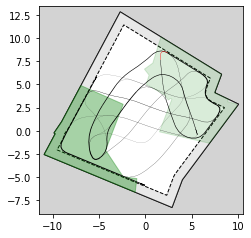

Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))<=0
Adding VertexPassage(PointVertex[140648832

<Figure size 432x288 with 0 Axes>

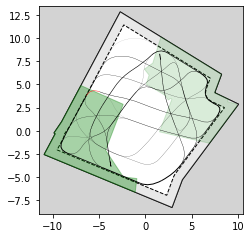

Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))<=0
Removing VertexPassage(PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631)<- PointVertex[140648832799440]@(0.4497625070560354, -6.097028636384029) ->PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631))<=0
Removing VertexPassage(PointVertex[

<Figure size 432x288 with 0 Axes>

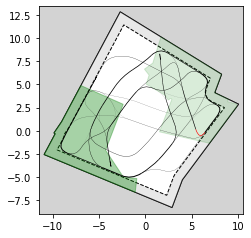

Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Removing VertexPassage(PointVertex[

<Figure size 432x288 with 0 Axes>

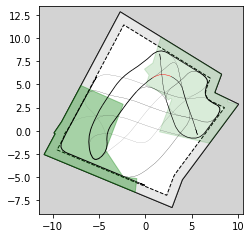

Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Adding VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905) ->PointVertex[140648849371792]@(-9.39163445769202, -2.021160692861287))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Adding VertexPassage(PointVertex[14064

<Figure size 432x288 with 0 Axes>

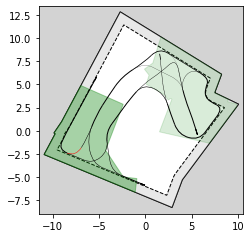

Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))<=0
Removing VertexPassage(PointVertex[140648832

<Figure size 432x288 with 0 Axes>

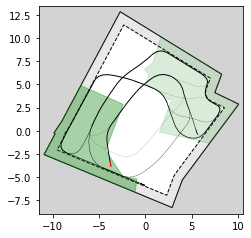

Adding VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589) ->PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 174 rows, 844 columns and 1949 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0168655e+02   5.500000e-01   0.000000e+00      0s
      17    2.0847683e+02   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.01 seconds
Optimal objective  2.084768276e+02
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832801872]@(-3.60054

<Figure size 432x288 with 0 Axes>

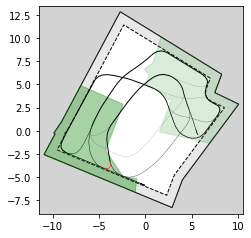

Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148)<- PointVertex[140648839973136]@(-5.056847597667449, 6.199638797910038) ->PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148))>=1
Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))<=0
Removing VertexPassage(PointVertex[140648839974736]

<Figure size 432x288 with 0 Axes>

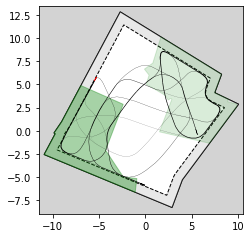

Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905) ->PointVertex[140648849371792]@(-9.39163445769202, -2.021160692861287))>=1
Removing VertexPassage(PointVertex[140648832

<Figure size 432x288 with 0 Axes>

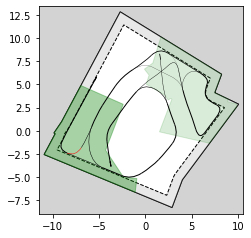

Removing VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))>=1
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905) ->PointVertex[140648849371792]@(-9.39163445769202, -2.021160692861287))<=0
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))<=0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (

<Figure size 432x288 with 0 Axes>

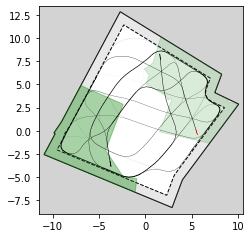

Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832799120]@(-5.306944166965761, 1.672486823337938)<- PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509) ->PointVertex[140648832801360]@(-4.25592319641893, -0.1260780219934954))>=1
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))<=0
Removing VertexPassage(PointVertex[140648

<Figure size 432x288 with 0 Axes>

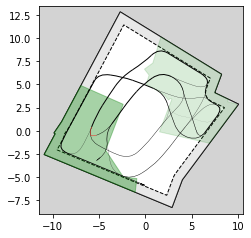

Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813)<- PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899) ->PointVertex[140648839973264]@(4.305726616850353, 3.366737251686373))>=1
Removing VertexPassage(PointVertex[140648839971856]@(3

<Figure size 432x288 with 0 Axes>

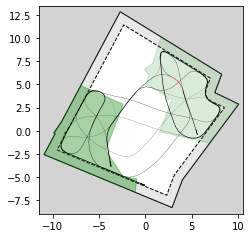

Adding VertexPassage(PointVertex[140648833843088]@(6.88841035705808, 5.632695261147429)<- PointVertex[140648839972432]@(5.092742162779579, 6.738269510378254) ->PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 173 rows, 844 columns and 1948 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0241705e+02   5.000000e-01   0.000000e+00      0s
      15    2.1389586e+02   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.01 seconds
Optimal objective  2.138958645e+02
Removing VertexPassage(PointVertex[140648833843088]@(6.88841035705808, 5.632695261147429)<- PointVertex[140648839972432]@(5.092742162779579, 6

<Figure size 432x288 with 0 Axes>

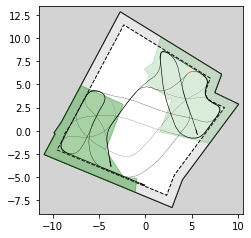

Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Removing VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631)<- PointVertex[140648832799440]@(0.4497625070560354, -6.097028636384029) ->PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631))>=1
Removing VertexPassage(PointVertex[1406488399

<Figure size 432x288 with 0 Axes>

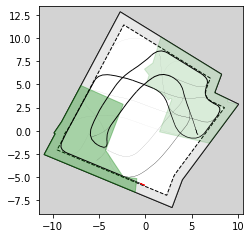

Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832799120]@(-5.306944166965761, 1.672486823337938)<- PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Removing VertexPassage(PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148)<- PointVertex[140648839973136]@(-5.056847597667449, 6.199638797910038) ->PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148))<=0
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Removing VertexPassage(PointVertex[1406488

<Figure size 432x288 with 0 Axes>

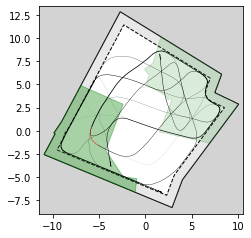

Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813)<- PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899) ->PointVertex[140648839973264]@(4.305726616850353, 3.366737251686373))>=1
Adding VertexPassage(PointVertex[140648832799120]@(-5.306944166965761, 1.672486823337938)<- PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509) ->PointVertex[140648832801360]@(-4.25592319641893, -0.1260780219934954))>=1
Removing VertexPassage(PointVertex[140648839971856]@(3

<Figure size 432x288 with 0 Axes>

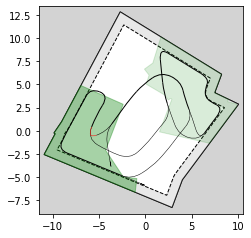

Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Removing VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Removing VertexPassage(PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813)<- PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899) ->PointVertex[140648839973264]@(4.305726616850353, 3.366737251686373))>=1
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Removing VertexPassage(PointVertex[14064883279912

<Figure size 432x288 with 0 Axes>

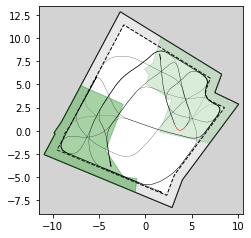

Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161)<- PointVertex[140648839973136]@(-5.056847597667449, 6.199638797910038) ->PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148))>=1
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))<=0
Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))<=0
Removing VertexPassage(PointVertex[14064883997

<Figure size 432x288 with 0 Axes>

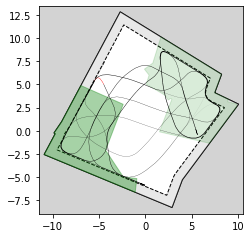

Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Adding VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Removing VertexPassage(PointVertex[14064

<Figure size 432x288 with 0 Axes>

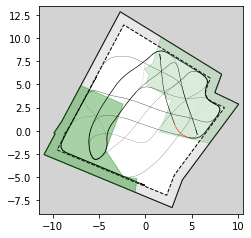

Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648832801168]@(2.22690537351817, -2.2978419497079656)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))<=0
Adding VertexPassage(PointVertex[140

<Figure size 432x288 with 0 Axes>

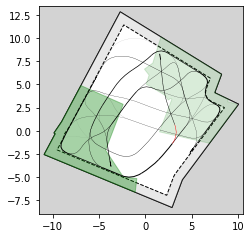

Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Adding VertexPassage(PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148)<- PointVertex[140648839973136]@(-5.056847597667449, 6.199638797910038) ->PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148))>=1
Removing VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))<=0
Removing VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))<=0
Removing VertexPassage(PointVertex[140648832801168]@

<Figure size 432x288 with 0 Axes>

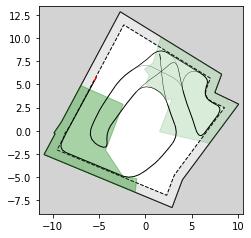

Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Removing VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Adding VertexPassage(PointVertex[140648832799824]@(8.393407352309685, 2.4517648778835595)<- PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))>=1
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905) ->PointVertex[140648849371792]@(-9.39163445769202, -2.021160692861287))<=0
Removing VertexPassage(PointVertex[14064

<Figure size 432x288 with 0 Axes>

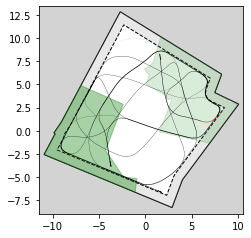

Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832801424]@(7.070618549447111, 0.6736201259473049))>=1
Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))<=0
Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))<=0
Removing VertexPassage(PointVertex[14064883280

<Figure size 432x288 with 0 Axes>

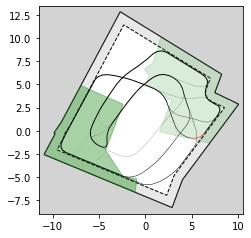

Removing VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))>=1
Removing VertexPassage(PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044)<- PointVertex[140648832802064]@(-5.681343919344355, -3.5577976480188145) ->PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905))<=0
Removing VertexPassage(PointVertex[140648832

<Figure size 432x288 with 0 Axes>

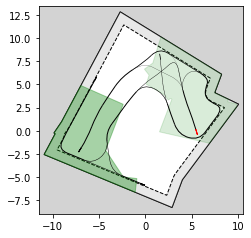

Removing VertexPassage(PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789)<- PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885) ->PointVertex[140648832802704]@(2.737782096388452, 1.7960809434379856))>=1
Adding VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648832799120]@(-5.306944166965761, 1.672486823337938)<- PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509) ->PointVertex[140648832802000]@(-4.02715355559026, -2.2068375884739044))>=1
Removing VertexPassage(PointVertex[140648832798864]@(3.6002259451603025, -0.4631571271890885)<- PointVertex[140648832801104]@(5.80461153863519, -1.0281963071205789) ->PointVertex[140648832800912]@(5.080019767656369, 1.3558162807012917))<=0
Removing VertexPassage(PointVertex[1406

<Figure size 432x288 with 0 Axes>

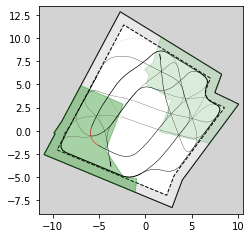

Removing VertexPassage(PointVertex[140648832801040]@(0.6568653103455383, -3.9395265130388077)<- PointVertex[140648832799888]@(-1.5266109808677808, -5.278502834334631) ->PointVertex[140648832801872]@(-3.6005429687624524, -4.419572650257589))>=1
Adding VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Adding VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Adding VertexPassage(PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813)<- PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899) ->PointVertex[140648839973264]@(4.305726616850353, 3.366737251686373))>=1
Adding VertexPassage(PointVertex[140648832798864]

<Figure size 432x288 with 0 Axes>

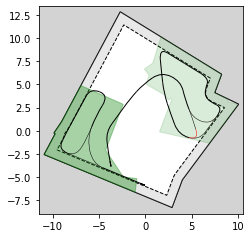

Adding VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.528431080147335, -2.7928164797378905) ->PointVertex[140648849371792]@(-9.39163445769202, -2.021160692861287))>=1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 175 rows, 844 columns and 1950 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0369076e+02   5.000000e-01   0.000000e+00      0s
      14    2.0947198e+02   0.000000e+00   0.000000e+00      0s

Solved in 14 iterations and 0.01 seconds
Optimal objective  2.094719785e+02
Removing VertexPassage(PointVertex[140648832801744]@(-6.294283196871354, -0.8485655495564509)<- PointVertex[140648832802128]@(-7.52843

<Figure size 432x288 with 0 Axes>

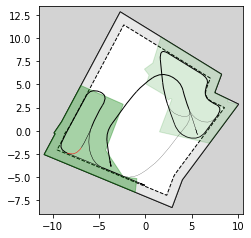

Removing VertexPassage(PointVertex[140648839971856]@(3.3293636904248243, 7.823963313328713)<- PointVertex[140648839971984]@(1.5000589646795635, 8.950247225481442) ->PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813))>=1
Removing VertexPassage(PointVertex[140648832798992]@(-6.801605934761126, 2.988700565056511)<- PointVertex[140648839974736]@(-5.936133488050541, 4.581459005892148) ->PointVertex[140648839973904]@(-3.9450480107254537, 3.824429204388161))>=1
Removing VertexPassage(PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813)<- PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899) ->PointVertex[140648839973264]@(4.305726616850353, 3.366737251686373))>=1
Adding VertexPassage(PointVertex[140648839972560]@(3.822741663632087, 5.346434529337899)<- PointVertex[140648839972688]@(1.7381785464840018, 6.361281358519813) ->PointVertex[140648839973584]@(-0.20771515315469838, 5.044818818379537))>=1
Adding VertexPassage(PointVertex[140648832801040]@

<Figure size 432x288 with 0 Axes>

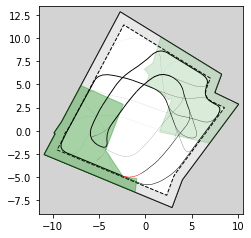

In [18]:
bnb = IntegralizingBnBTree(gi)
for i in range(40):
    if bnb.is_integral():
        break
    node, vp = bnb.branch()
    ax = setup_plot(figsize=figsize)
    plot_polygon_instance(ax, pi2)
    plot_branching(ax, node.solution, vp)
    plt.show()